In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette="deep")

model_title = "Mistral 24B"

mmlu_entropy_df = pd.read_csv(
    "../../../data/out/single_token_entropy/mmlu_mistral_24b.tsv",
    sep="\t",
    header=0,
    dtype={"entropy_ans_mistral": "str"},
)

In [2]:
mmlu_entropy_df.value_counts("entropy_ans_mistral", dropna=False)

entropy_ans_mistral
1      1660
7      1475
2      1394
3      1306
9      1254
4      1244
6      1171
8      1161
5       747
NaN     620
Name: count, dtype: int64

In [3]:
from reasoning_fine_tune.utils.validation import keep_only_valid_and_known_answers

mmlu_entropy_df = keep_only_valid_and_known_answers(mmlu_entropy_df, "entropy_ans_mistral")
mmlu_entropy_df.value_counts("entropy_ans_mistral", dropna=False)

entropy_ans_mistral
1    1660
7    1475
2    1394
3    1306
9    1254
4    1244
6    1171
8    1161
5     747
Name: count, dtype: int64

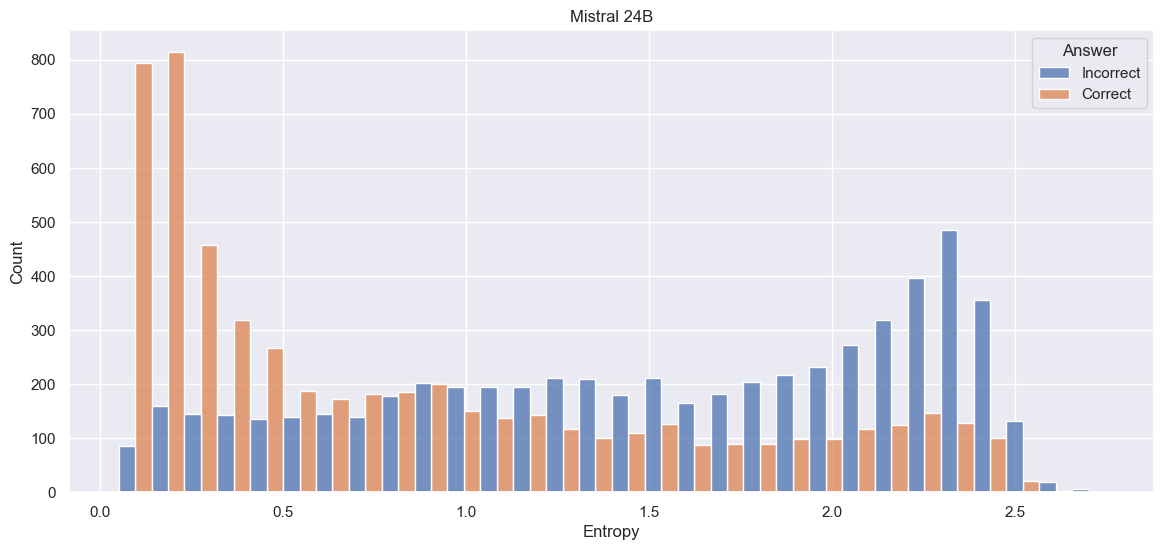

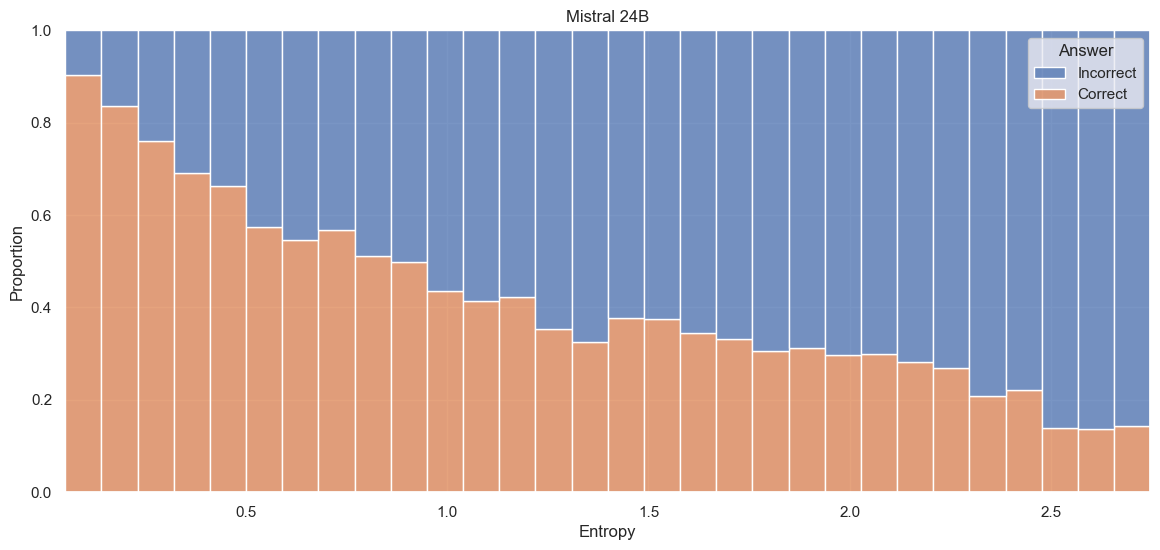

In [4]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(mmlu_entropy_df, "entropy_value_mistral", "entropy_ans_correct_mistral", model_name=model_title)

In [5]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df,
    category_col="category",
    model_answer_correct_col="entropy_ans_correct_mistral",
    score_col="entropy_value_mistral",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.753177,0.506354,11412,0.487820,Mistral 24B,entropy_value_mistral
1,law,0.689733,0.379466,1101,0.407811,Mistral 24B,entropy_value_mistral
2,business,0.689783,0.379567,764,0.396597,Mistral 24B,entropy_value_mistral
3,psychology,0.790587,0.581174,797,0.659975,Mistral 24B,entropy_value_mistral
4,chemistry,0.682691,0.365382,987,0.376900,Mistral 24B,entropy_value_mistral
5,biology,0.814836,0.629672,716,0.738827,Mistral 24B,entropy_value_mistral
6,history,0.693181,0.386362,381,0.543307,Mistral 24B,entropy_value_mistral
7,other,0.790926,0.581853,924,0.517316,Mistral 24B,entropy_value_mistral
8,physics,0.740319,0.480639,1181,0.379340,Mistral 24B,entropy_value_mistral
9,computer science,0.766189,0.532378,404,0.514851,Mistral 24B,entropy_value_mistral
